# Q1 - image conversion

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
# img_path = "images/flowingriver.jpg"
# img_path = "images/amyhill.jpg"
img_path = "images/meclimbing.jpg"


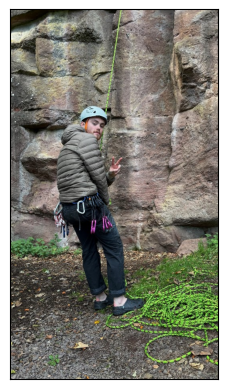

In [2]:
# Display original image

# read using openCV
img = cv.imread(img_path, 1)

# display using matplotlib
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

### Define general plotting function

In [3]:
def plotbyside(
                img1,title1,
                img2=None,title2=None,
                img3=None,title3=None,
                cmap1=None, cmap2=None, cmap3=None,
                figsize=(5,3.5)
    ):
    
    # always have at least 1 image
    if img2 is None and img3 is None:

        # convert BGR to RGB for correct colour display
        img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

        plt.imshow(img1, cmap=cmap1)
        plt.title(title1)
        plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
        plt.show()
        return
    
    # error case with img 3 but no img 2
    if img2 is None and img3 is not None:
        raise ValueError("Cannot provide img3 without img2")
    
    # 2 image case
    if img3 is None:
        fig, ax = plt.subplot_mosaic([
            ['img1','img2'],
        ], figsize=figsize)
        
        # convert BGR to RGB for correct colour display
        img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
        img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

        # img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        ax['img1'].imshow(img1, cmap=cmap1)
        ax['img1'].set_title(title1)
        ax['img1'].axis('off')

        ax['img2'].imshow(img2, cmap=cmap2)
        ax['img2'].set_title(title2)
        ax['img2'].axis('off')
        
        plt.show()
        return
    
    # 3 image case
    fig, ax = plt.subplot_mosaic([
        ['img1','img2','img3'],
    ], figsize=figsize)

    # convert BGR to RGB for correct colour display
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

    ax['img1'].imshow(img1, cmap=cmap1)
    ax['img1'].set_title(title1)
    ax['img1'].axis('off')

    ax['img2'].imshow(img2, cmap=cmap2)
    ax['img2'].set_title(title2)
    ax['img2'].axis('off')

    ax['img3'].imshow(img3, cmap=cmap3)
    ax['img3'].set_title(title3)
    ax['img3'].axis('off')

    plt.show()

### Convert the image into grayscale and HSV/HLV

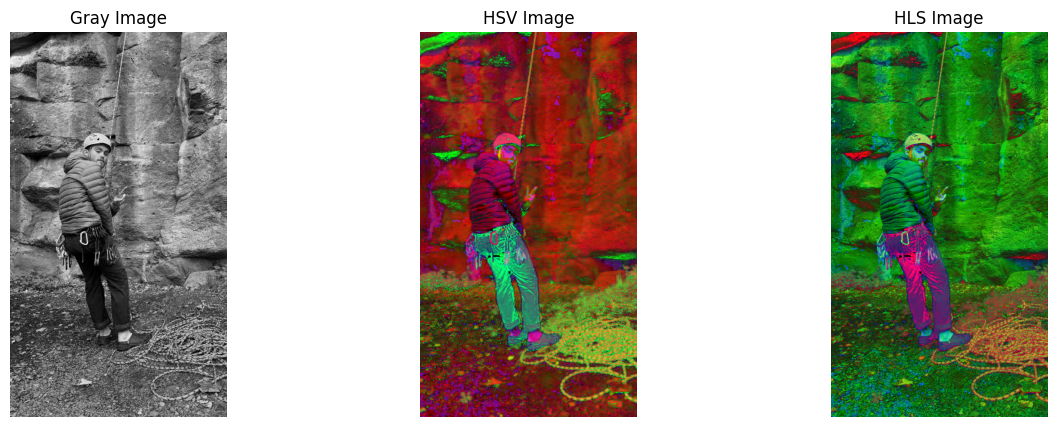

In [4]:
# conversions
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)


plotbyside(img_gray, "Gray Image", img_hsv, "HSV Image", img_hls, "HLS Image",cmap1='gray', figsize=(15,5))

### Binarize grayscale

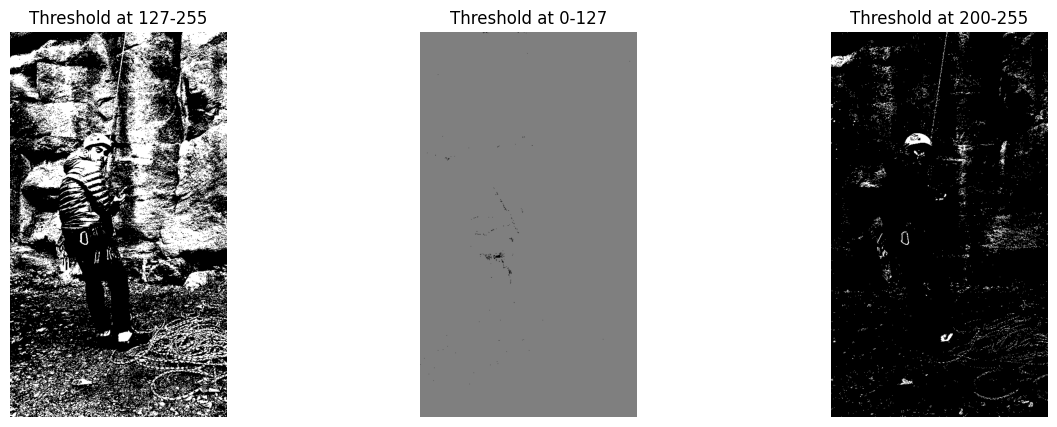

In [17]:
# check alive
assert img_gray is not None, "file could not be read, check with os.path.exists()"  

# thresholding vars
thvals1 = 127,255
thvals2 = 0,127
thvals3 = 200,255

ret,thresh1 = cv.threshold(img_gray,thvals1[0],thvals1[1],cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_gray,thvals2[0],thvals2[1],cv.THRESH_BINARY)
ret,thresh3 = cv.threshold(img_gray,thvals3[0],thvals3[1],cv.THRESH_BINARY)


plotbyside(thresh1, f'Threshold at {thvals1[0]}-{thvals1[1]}', thresh2, f'Threshold at {thvals2[0]}-{thvals2[1]}',thresh3, f'Threshold at {thvals3[0]}-{thvals3[1]}',cmap1='gray',cmap2='gray', cmap3='gray', figsize=(15,5))

# Geometric transforms

### Translation

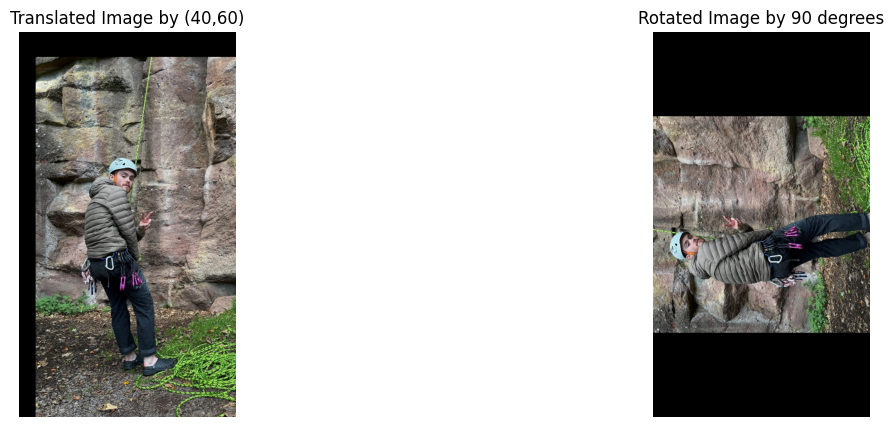

In [6]:
# check alive
assert img is not None, "file could not be read, check with os.path.exists()"

# find shape 
rows,cols,ch = img.shape

# translation matrix
tx = 40
ty = 60
M_trans = np.float32([[1,0,tx],[0,1,ty]])

# rotation matrix
# rotates with respect to center of image without any scaling
M_rot = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
img_rot = cv.warpAffine(img,M_rot,(cols,rows))

# translate image
img_trans = cv.warpAffine(img,M_trans,(cols,rows))

# display
plotbyside( img_trans, f'Translated Image by ({tx},{ty})', img_rot, 'Rotated Image by 90 degrees', figsize=(15,5))


# Smoothing Filters and Edge Detection

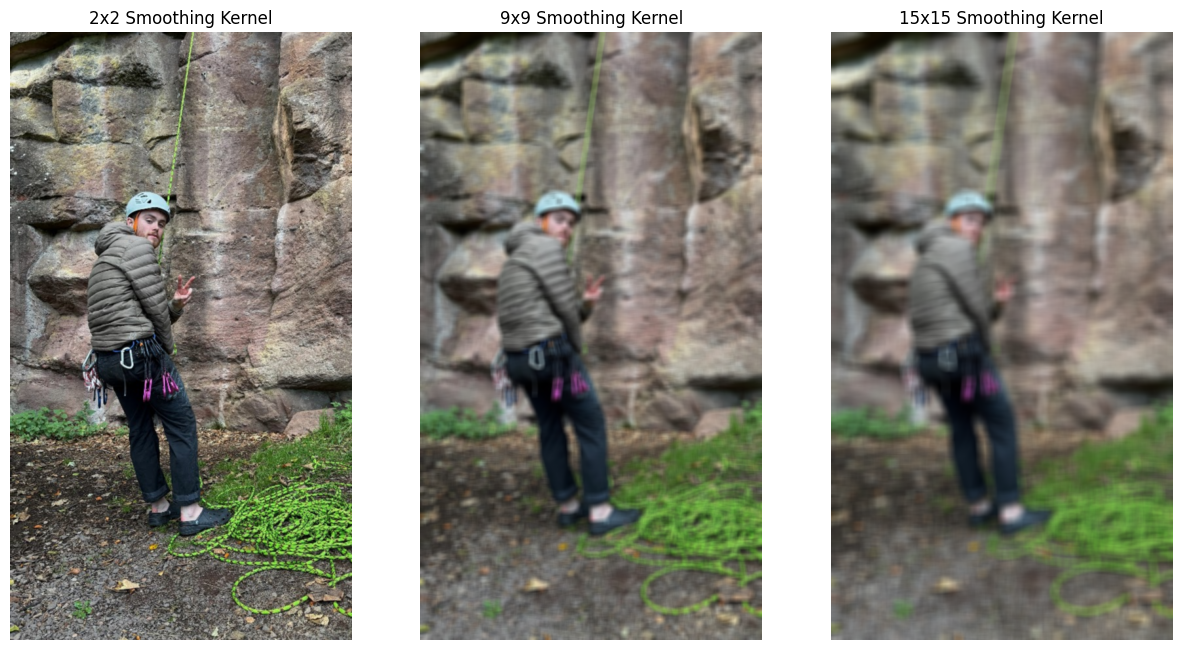

In [7]:
assert img is not None, "file could not be read, check with os.path.exists()"

# matrix for smoothing
kernel1 = np.ones((2,2),np.float32)/4
smoothed1 = cv.filter2D(img,-1,kernel1)

kernel2 = np.ones((9,9),np.float32)/81
smoothed2 = cv.filter2D(img,-1,kernel2)

kernel3 = np.ones((15,15),np.float32)/225
smoothed3 = cv.filter2D(img,-1,kernel3)

plotbyside( smoothed1, '2x2 Smoothing Kernel', smoothed2, '9x9 Smoothing Kernel', smoothed3, '15x15 Smoothing Kernel', figsize=(15,10))

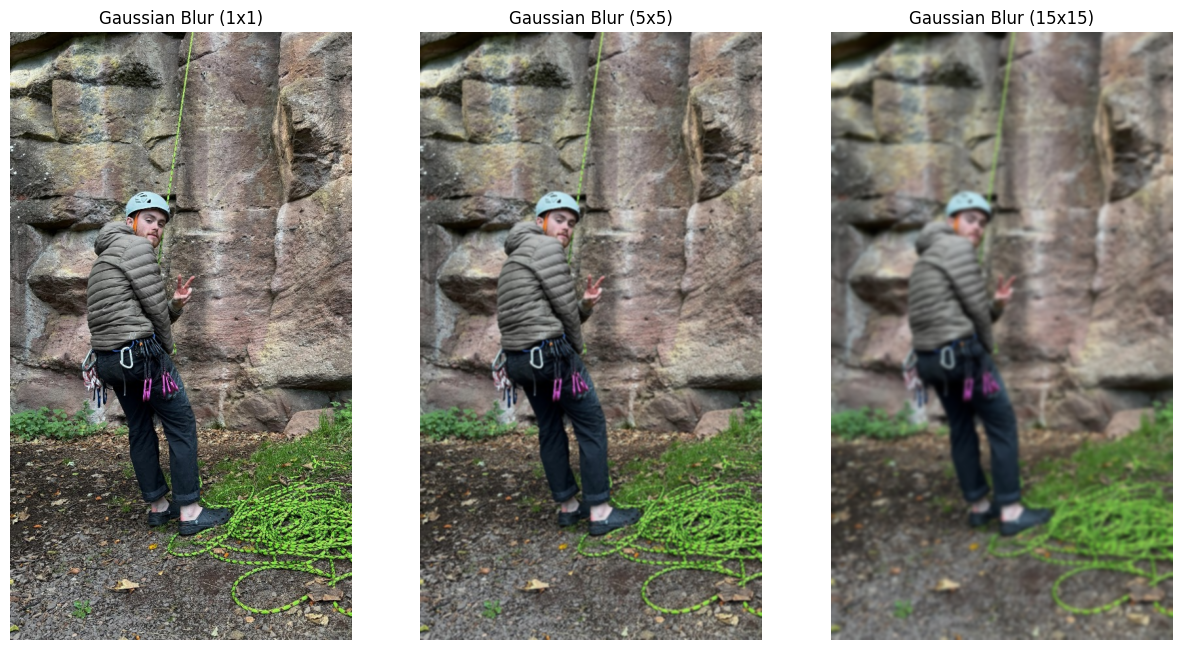

In [8]:
assert img is not None, "file could not be read, check with os.path.exists()"   

# gaussian blur (positive odd integers only)
blur1 = cv.GaussianBlur(img,(1,1),0)
blur2 = cv.GaussianBlur(img,(5,5),0)
blur3 = cv.GaussianBlur(img,(15,15),0)

plotbyside( blur1, 'Gaussian Blur (1x1)', blur2, 'Gaussian Blur (5x5)', blur3, 'Gaussian Blur (15x15)', figsize=(15,10))

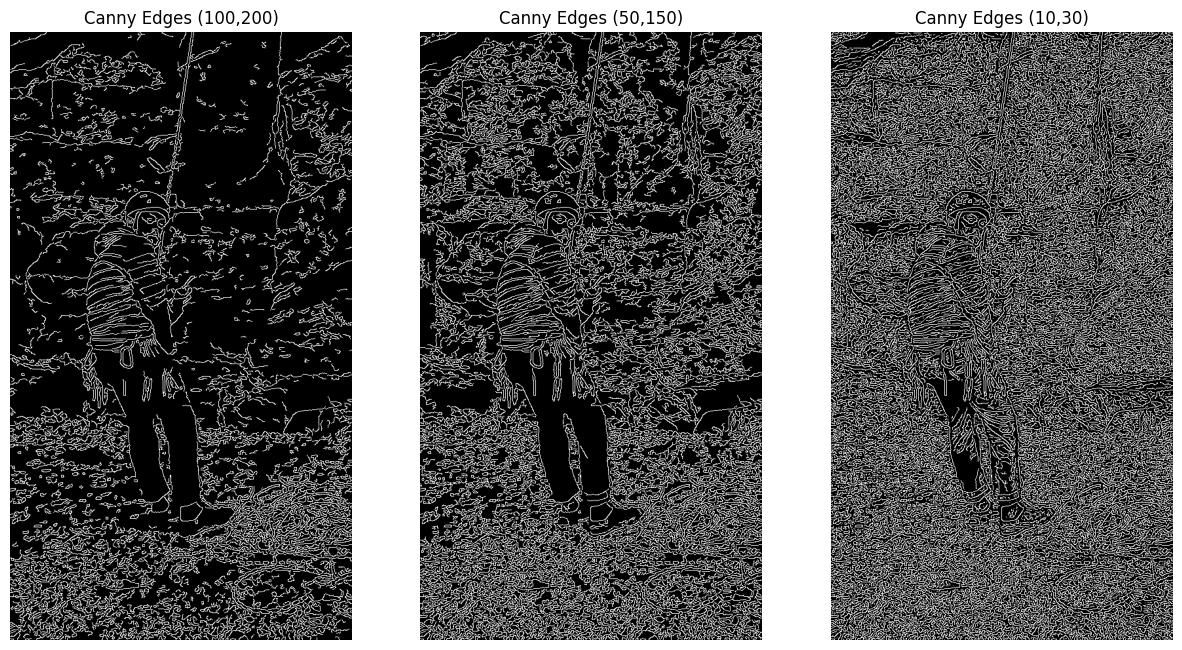

In [9]:
assert img is not None, "file could not be read, check with os.path.exists()"

# blur 2 is the 5x5 gaussian blur from previous cell
edges1 = cv.Canny(blur2,100,200)
edges2 = cv.Canny(blur2,50,150)
edges3 = cv.Canny(blur2,10,30)

plotbyside(edges1, 'Canny Edges (100,200)', edges2, 'Canny Edges (50,150)', edges3, 'Canny Edges (10,30)', cmap1='gray', cmap2='gray', cmap3='gray', figsize=(15,10))

# Intensity Range Adjustment and Hist equalisation

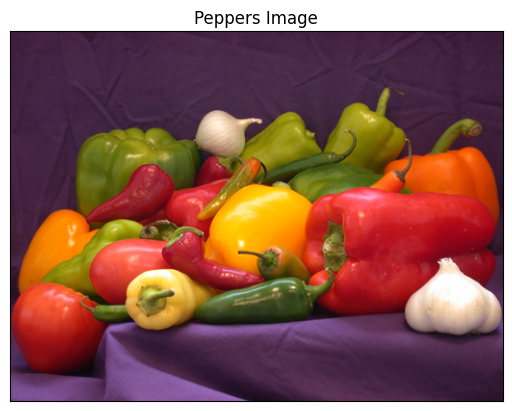

Image dimensions: 512 x 384 pixels with 3 channels


In [10]:
# find image
peppers_path = "images/peppers.png"


img_pep = cv.imread(peppers_path, 1)

assert img_pep is not None, "file could not be read, check with os.path.exists()"

# display
plotbyside(img_pep, 'Peppers Image', figsize=(5,5))

# find width, height and channels
rows,cols,ch = img_pep.shape
print(f'Image dimensions: {cols} x {rows} pixels with {ch} channels')

(([], []), ([], []))

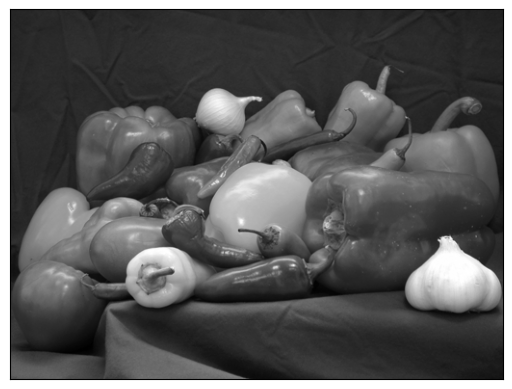

In [11]:
#conv to gscale
img_gray_pep = cv.cvtColor(img_pep, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray_pep, cmap='gray')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis


C:\Users\Luke\AppData\Local\Temp\ipykernel_21072\1869645282.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_gray_pep.ravel(),256,[0,256]); plt.show()


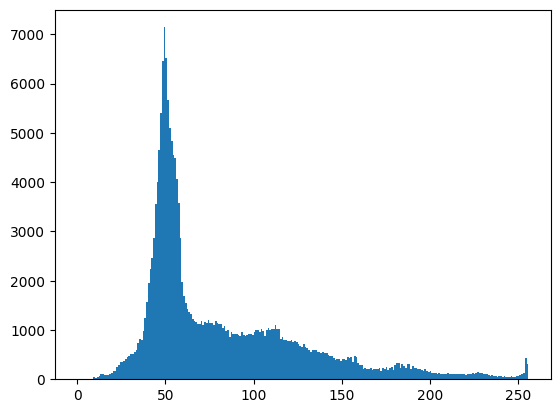

In [12]:
plt.hist(img_gray_pep.ravel(),256,[0,256]); plt.show()

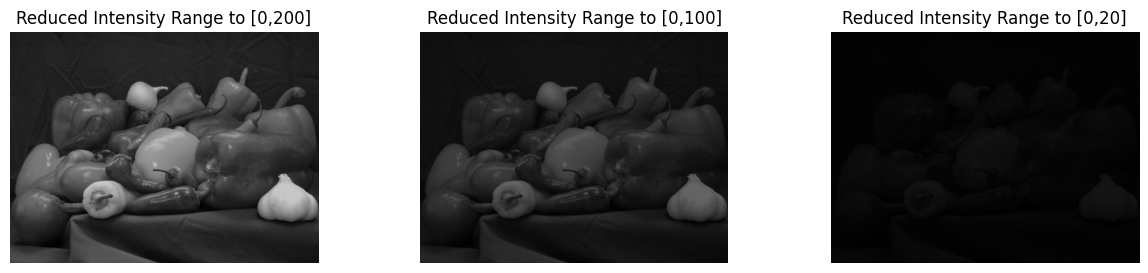

In [13]:
# Reduce the intensity range of the grayscale image to a lower range ([0,N]) for values of N ranging from 255 to 8. Display the resulting images.

# variables
N1 = 200
N2 = 100
N3 = 20

# reduce intensity range
reduced1 = cv.normalize(img_gray_pep, None, alpha=0, beta=N1, norm_type=cv.NORM_MINMAX)
reduced2 = cv.normalize(img_gray_pep, None, alpha=0, beta=N2, norm_type=cv.NORM_MINMAX)#
reduced3 = cv.normalize(img_gray_pep, None, alpha=0, beta=N3, norm_type=cv.NORM_MINMAX)

# plot images
plotbyside( reduced1, f'Reduced Intensity Range to [0,{N1}]', reduced2, f'Reduced Intensity Range to [0,{N2}]', reduced3, f'Reduced Intensity Range to [0,{N3}]', cmap1='gray', cmap2='gray', cmap3='gray', figsize=(15,3))

C:\Users\Luke\AppData\Local\Temp\ipykernel_21072\3126346182.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[0].hist(reduced1.ravel(),256,[0,256]); ax[0].set_title(f'Histogram of Reduced Intensity Image [0,{N1}]')
C:\Users\Luke\AppData\Local\Temp\ipykernel_21072\3126346182.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[1].hist(reduced2.ravel(),256,[0,256]); ax[1].set_title(f'Histogram of Reduced Intensity Image [0,{N2}]')
C:\Users\Luke\AppData\Local\Temp\ipykernel_21072\3126346182.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[2].hist(reduced3.ravel(),256,[0,256]); ax[2].set_title(f'Histogram of Reduced I

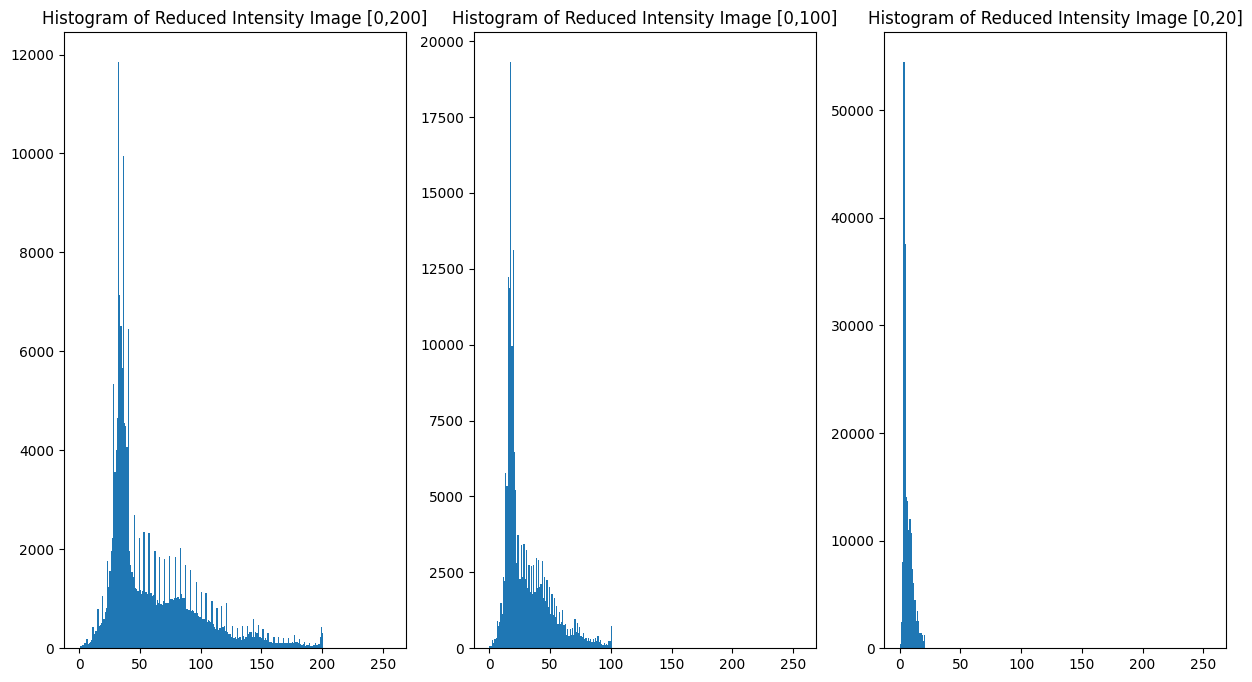

In [14]:
# plot histograms of reduced images
fig,ax = plt.subplots(1,3, figsize=(15,8))

ax[0].hist(reduced1.ravel(),256,[0,256]); ax[0].set_title(f'Histogram of Reduced Intensity Image [0,{N1}]')
ax[1].hist(reduced2.ravel(),256,[0,256]); ax[1].set_title(f'Histogram of Reduced Intensity Image [0,{N2}]')
ax[2].hist(reduced3.ravel(),256,[0,256]); ax[2].set_title(f'Histogram of Reduced Intensity Image [0,{N3}]')
plt.show()

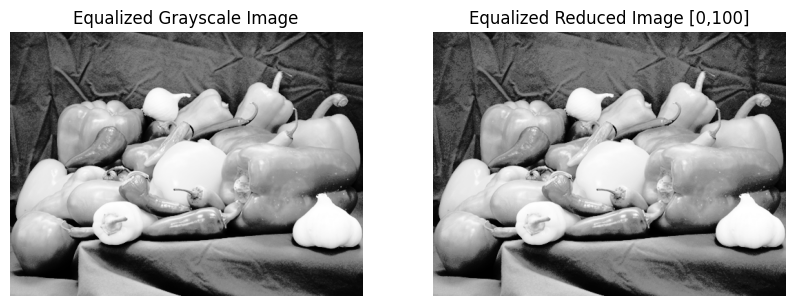

In [15]:
# equalise histgroam of grayscale image and reduced image
gray_pep_eq = cv.equalizeHist(img_gray_pep)
reduced_pep_eq = cv.equalizeHist(reduced2)

# display images
plotbyside( gray_pep_eq, 'Equalized Grayscale Image', reduced_pep_eq, f'Equalized Reduced Image [0,{N2}]', cmap1='gray', cmap2='gray', figsize=(10,5))


C:\Users\Luke\AppData\Local\Temp\ipykernel_21072\1421953814.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[0].hist(gray_pep_eq.ravel(),256,[0,256]); ax[0].set_title('Histogram of Equalized Grayscale Image')
C:\Users\Luke\AppData\Local\Temp\ipykernel_21072\1421953814.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[1].hist(reduced_pep_eq.ravel(),256,[0,256]); ax[1].set_title(f'Histogram of Equalized Reduced Image [0,{N2}]')


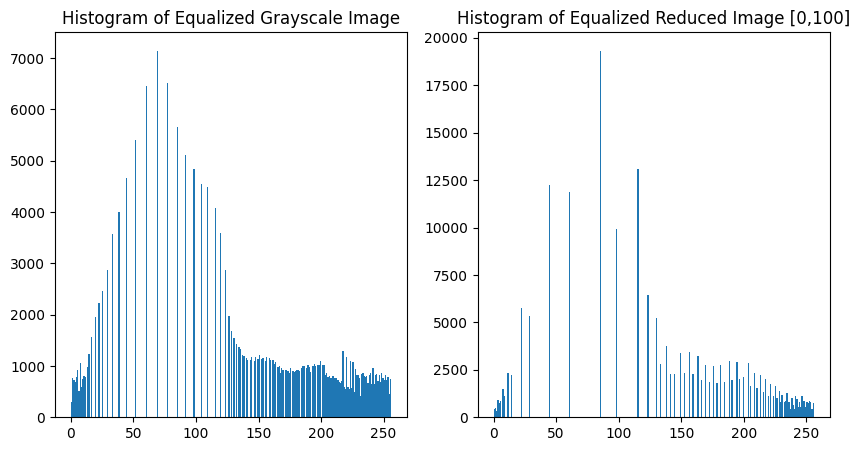

In [16]:
# plot the equalized histograms
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(gray_pep_eq.ravel(),256,[0,256]); ax[0].set_title('Histogram of Equalized Grayscale Image')
ax[1].hist(reduced_pep_eq.ravel(),256,[0,256]); ax[1].set_title(f'Histogram of Equalized Reduced Image [0,{N2}]')
plt.show()